# CNMF on L23

In [40]:
# imports
from importlib import reload

import numpy as np

import matplotlib.pyplot as plt

import pandas
import seaborn as sns

from oceancolor.iop import cross

from ihop.iops import pca as ihop_pca

from cnmf.oceanography import iops
from cnmf import nmf_imaging
from cnmf import io as cnmf_io
from cnmf import zhu_nmf as nmf

from IPython import embed

In [41]:
%matplotlib ipympl

# Load

In [13]:
reload(iops)
iop = 'a'
spec_w, mask, err, wave, Rs = iops.prep_loisel23(iop, remove_water=False)

In [6]:
wave.shape

(71,)

In [24]:
spec_w.shape, err.shape

((3320, 71, 1), (3320, 71, 1))

# CNMF me

## $W_{\rm ini}$

In [15]:
nfixed = 1
nnew = 4
ncomponents = nfixed + nnew

In [16]:
W_ini = np.random.rand(ncomponents, wave.size)
W_ini.shape

(5, 71)

## Put in the water

In [17]:
a_w = cross.a_water(wave, data='IOCCG')

In [18]:
W_ini[0,...] = a_w

In [27]:
W_ini.T.shape

(71, 5)

## Init

In [35]:
reload(nmf)
X = spec_w[:,:,0].T
V = (1./err[:,:,0]**2).T
CNMF = nmf.NMF(X, W=W_ini.T, H=None, V=V, M=None, n_components=ncomponents)

## Solve

In [36]:
CNMF.SolveNMF(W_only=False, H_only=False, 
              sparsemode=False, maxiters=None, tol=None,
              nfixed=1, verbose=True)

Current Chi2=29.6714, Previous Chi2=354.4687, Change=91.6293% @ niters=0
Current Chi2=0.5155, Previous Chi2=0.5299, Change=2.7151% @ niters=20
Current Chi2=0.3535, Previous Chi2=0.3589, Change=1.5101% @ niters=40
Current Chi2=0.2397, Previous Chi2=0.2464, Change=2.7019% @ niters=60
Current Chi2=0.1252, Previous Chi2=0.1294, Change=3.2852% @ niters=80
Current Chi2=0.0658, Previous Chi2=0.0678, Change=3.0141% @ niters=100
Current Chi2=0.0376, Previous Chi2=0.0385, Change=2.5169% @ niters=120
Current Chi2=0.0238, Previous Chi2=0.0243, Change=2.0190% @ niters=140
Current Chi2=0.0166, Previous Chi2=0.0169, Change=1.6078% @ niters=160
Current Chi2=0.0124, Previous Chi2=0.0126, Change=1.2829% @ niters=180
Current Chi2=0.0099, Previous Chi2=0.0100, Change=1.0202% @ niters=200
Current Chi2=0.0082, Previous Chi2=0.0083, Change=0.8161% @ niters=220
Current Chi2=0.0071, Previous Chi2=0.0072, Change=0.6558% @ niters=240
Current Chi2=0.0063, Previous Chi2=0.0064, Change=0.5211% @ niters=260
Current 

(0.0030470540461375118, 0.09630384445190429)

## View

In [38]:
CNMF.W.T.shape

(5, 71)

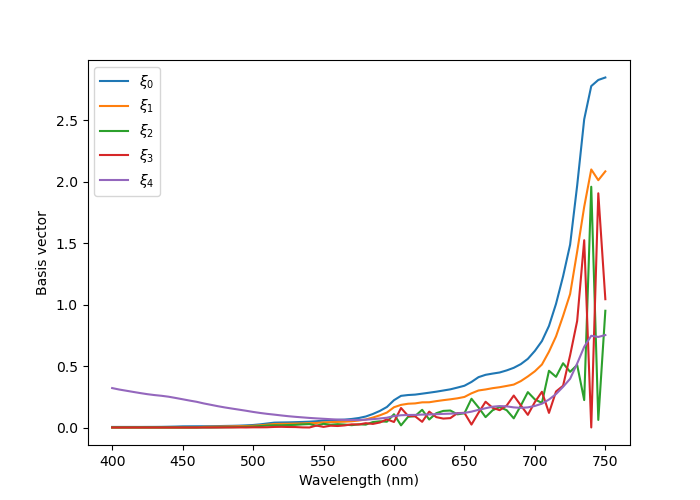

In [42]:
M = CNMF.W.T
#
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
for ss in range(M.shape[0]):
    ax.plot(wave,M[ss], label=r'$\xi_'+f'{ss}'+'$')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Basis vector')
ax.legend()
#
plt.show()